In [1]:
import pandas as pd
import io
import requests
import numpy as np
import time#To time the training times

s=requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data").content
data=pd.read_csv(io.StringIO(s.decode('utf-8')),error_bad_lines=False,header=None)

In [2]:
#Splitting to X,y and taking care of missing data
X,y=pd.DataFrame(data.iloc[:,:34].values),pd.DataFrame(data.iloc[:,34].values)
y=y-1#Getting all labels to index values i.e.[0,5]
X[33]=X[33].replace('?',np.nan)
X[33]=pd.to_numeric(X[33], downcast='float')
X[33]=X[33].fillna(X[33].mean())

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

In [5]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC

svm_clf = Pipeline(( #For faster implementation of SVM
        ("scaler", StandardScaler()), 
        ("linear_svc", LinearSVC(C=1, loss="hinge")),)) 

In [6]:
#Fit and predict
start = time.time()
svm_clf.fit(X_train, y_train)
y_pred=svm_clf.predict(X_test)
end = time.time()

C:\Users\vikhy\Anaconda3\Anaconda-3.5\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
import numpy as np
def plot_results(y_test,y_pred):
    conf_mx=confusion_matrix(y_test,y_pred)
    print('Confusion matrix\n',conf_mx)
    print('Accuracy: ',accuracy_score(y_test,y_pred)*100,'%')
    #Precision,recalland f1 scores
    print('Precision:',precision_score(y_test, y_pred,average='micro'))
    print('Recall:',recall_score(y_test, y_pred,average='micro')) 
    print('F1 score:',f1_score(y_test, y_pred,average='micro'))  
    print('Confusion matrix')
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    plt.show()
    print('Confusion matrix of errors')
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums
    np.fill_diagonal(norm_conf_mx, 0) 
    plt.matshow(norm_conf_mx, cmap=plt.cm.gray) 
    plt.show()

Confusion matrix
 [[34  0  0  0  0  0]
 [ 0 16  0  1  0  0]
 [ 0  0 16  0  0  0]
 [ 0  1  0 10  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0  5]]
Accuracy:  97.8260869565 %
Precision: 0.978260869565
Recall: 0.978260869565
F1 score: 0.978260869565
Confusion matrix


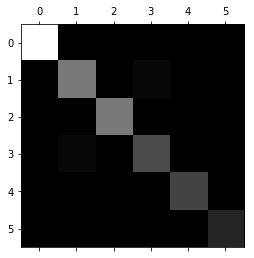

Confusion matrix of errors


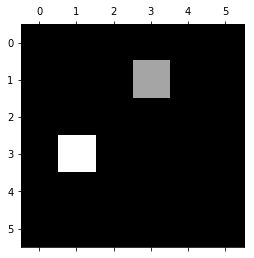

Time elapsed:  0.12591052055358887 seconds


In [8]:
plot_results(y_test,y_pred)
print('Time elapsed: ',end - start,'seconds')

In [9]:
import tensorflow as tf
#Construction
config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[20], n_classes=6,feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) 

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000022CFE25F550>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\vikhy\\AppData\\Local\\Temp\\tmp92tt1fyf'}


In [10]:
#Execution
start = time.time()
dnn_clf.fit(X_train, y_train, batch_size=1, steps=300)
#Evaluating accuracy on the test set
from sklearn.metrics import accuracy_score
y_pred = dnn_clf.predict(X_test)
end = time.time()

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\vikhy\AppData\Local\Temp\tmp92tt1fyf\model.ckpt.
INFO:tensorflow:loss = 3.15419, step = 1
INFO:tensorflow:global_step/sec: 628.653
INFO:tensorflow:loss = 0.0303086, step = 101 (0.163 sec)
INFO:tensorflow:global_step/sec: 423.57
INFO:tensorflow:loss = 0.65884, step = 201 (0.231 sec)
INFO:tensorflow:Saving checkpoints for 300 into C:\Users\vikhy\AppData\Local\Temp\tmp92tt1fyf\model.ckpt.
INFO:tensorflow:Loss for final step: 0.00197942.
INFO:tensorflow:Restoring parameters from C:\Users\vikhy\AppData\Local\Temp\tmp92tt1fyf\model.ckpt-300


Confusion matrix
 [[34  0  0  0  0  0]
 [ 0 16  0  1  0  0]
 [ 0  0 16  0  0  0]
 [ 0  0  0 11  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0  5]]
Accuracy:  98.9130434783 %
Precision: 0.989130434783
Recall: 0.989130434783
F1 score: 0.989130434783
Confusion matrix


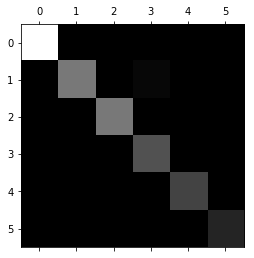

Confusion matrix of errors


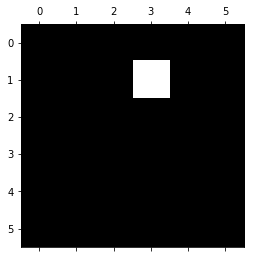

Time elapsed:  2.6081459522247314 seconds


In [66]:
plot_results(y_test,y_pred['classes'])
print('Time elapsed: ',end - start,'seconds')

In [12]:
y_pred['classes']

array([0, 0, 0, 5, 2, 1, 3, 2, 3, 0, 0, 0, 2, 0, 1, 0, 2, 0, 2, 2, 1, 0, 5,
       3, 2, 1, 0, 1, 0, 0, 4, 0, 0, 3, 2, 2, 0, 5, 1, 4, 4, 0, 2, 0, 4, 3,
       1, 0, 1, 0, 0, 2, 0, 0, 1, 3, 1, 3, 4, 1, 4, 1, 1, 0, 0, 3, 0, 0, 0,
       1, 0, 5, 0, 2, 3, 1, 2, 4, 0, 2, 3, 5, 2, 4, 0, 0, 0, 1, 3, 4, 2, 1], dtype=int64)